In [6]:
#!/usr/bin/env python
# coding: utf-8
import pandas as pd
import time
from gensim import corpora
import gensim

data1 = pd.read_csv("../data/news_data/data_1.csv", encoding="gbk")
data2 = pd.read_csv("../data/news_data/data_2.csv", encoding="gbk")
data3 = pd.read_csv("../data/news_data/data_3.csv", encoding="gbk")
data4 = pd.read_csv("../data/news_data/data_4.csv", encoding="gbk")

all_data = pd.concat([data1, data2], ignore_index=True)
all_data = pd.concat([all_data, data3], ignore_index=True)
all_data = pd.concat([all_data, data4], ignore_index=True)

all_data["content"] = all_data.apply(lambda x: x["content"].strip().split(" "), axis=1)
texts = all_data["content"].to_list()
print("get all data")

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]


get all data


In [7]:
passes = range(1,15)
for passe in passes:
    start = time.time()
    print("start to run %d!" % passe)
    # generate LDA model
    ldamodel_p = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=8, id2word = dictionary,iterations = 200,passes = passe, random_state=1)
    # random_state 等价于随机种子的random.seed()，使每次产生的主题一致
    end = time.time()
    ldamodel_p.save('../model/lda_model_passes/lda_%d.model' % passe)
    print("running time is ", end-start)

start to run 1!
running time is  97.12597870826721
start to run 2!
running time is  185.45994400978088
start to run 3!
running time is  268.89323019981384
start to run 4!
running time is  350.1023669242859
start to run 5!
running time is  431.404066324234
start to run 6!
running time is  513.3615016937256
start to run 7!
running time is  595.5615620613098
start to run 8!
running time is  760.0901761054993
start to run 10!
running time is  842.5893757343292
start to run 11!
running time is  923.0382642745972
start to run 12!
running time is  1003.9249877929688
start to run 13!
running time is  1088.222119808197
start to run 14!
running time is  1168.9328634738922


In [17]:
iterations = range(50,501,50)
for iteration in iterations:
    start = time.time()
    print("start to run %d!" % iteration)
    # generate LDA model
    ldamodel_t = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=8, id2word = dictionary,iterations = iteration,passes = 6,random_state=1)
    # random_state 等价于随机种子的random.seed()，使每次产生的主题一致
    end = time.time()
    ldamodel_t.save('../model/lda_model_iterations/lda_%d.model' % iteration)
    print("running time is ", end-start)

start to run 50!
running time is  513.4571871757507
start to run 100!
running time is  523.8894398212433
start to run 150!
running time is  522.793967962265
start to run 200!
running time is  518.8606684207916
start to run 250!
running time is  519.2990901470184
start to run 300!
running time is  523.1793825626373
start to run 350!
running time is  522.7032480239868
start to run 400!
running time is  521.8497860431671
start to run 450!
running time is  523.1207096576691
start to run 500!
running time is  523.5224807262421


In [35]:
iterations_2 = range(10,51,10)
for iteration in iterations_2:
    start = time.time()
    print("start to run %d!" % iteration)
    # generate LDA model
    ldamodel_t = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=8, id2word = dictionary,iterations = iteration,passes = 6,random_state=1)
    # random_state 等价于随机种子的random.seed()，使每次产生的主题一致
    end = time.time()
    ldamodel_t.save('../model/lda_model_iterations/lda_%d.model' % iteration)
    print("running time is ", end-start)

start to run 10!
running time is  374.85438442230225
start to run 20!
running time is  449.1801700592041
start to run 30!
running time is  487.67924880981445
start to run 40!
running time is  507.36988401412964
start to run 50!
running time is  513.1650953292847


In [39]:
nums = range(1,21)
for num in nums:
    start = time.time()
    print("start to run %d!" % num)
    # generate LDA model
    ldamodel_t = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num, id2word = dictionary,iterations = 50,passes = 6,random_state=1)
    # random_state 等价于随机种子的random.seed()，使每次产生的主题一致
    end = time.time()
    ldamodel_t.save('../model/lda_model_topicnums/lda_%d.model' % num)
    print("running time is ", end-start)

start to run 1!
running time is  171.4447386264801
start to run 2!
running time is  370.6476390361786
start to run 3!
running time is  435.02630853652954
start to run 4!
running time is  462.8616290092468
start to run 5!
running time is  471.9992687702179
start to run 6!
running time is  493.3192648887634
start to run 7!
running time is  511.7531142234802
start to run 8!
running time is  515.4442136287689
start to run 9!
running time is  544.92409324646
start to run 10!
running time is  567.4292943477631
start to run 11!
running time is  588.9216375350952
start to run 12!
running time is  603.6714091300964
start to run 13!
running time is  632.8118510246277
start to run 14!
running time is  648.6602523326874
start to run 15!
running time is  672.268449306488
start to run 16!
running time is  679.9521870613098
start to run 17!
running time is  707.2871878147125
start to run 18!
running time is  722.741730928421
start to run 19!
running time is  739.8101170063019
start to run 20!
running

In [9]:
def perplexity(ldamodel, testset, dictionary, size_dictionary, num_topics):
    """calculate the perplexity of a lda-model"""
    # dictionary : {7822:'deferment', 1841:'circuitry',19202:'fabianism'...]
    print ('the info of this ldamodel: \n')
    print ('num of testset: %s; size_dictionary: %s; num of topics: %s'%(len(testset), size_dictionary, num_topics))
    prep = 0.0
    prob_doc_sum = 0.0
    topic_word_list = [] # store the probablity of topic-word:[(u'business', 0.010020942661849608),(u'family', 0.0088027946271537413)...]
    for topic_id in range(num_topics):
        topic_word = ldamodel.show_topic(topic_id, size_dictionary)
        dic = {}
        for word, probability in topic_word:
            dic[word] = probability
        topic_word_list.append(dic)
    doc_topics_ist = [] #store the doc-topic tuples:[(0, 0.0006211180124223594),(1, 0.0006211180124223594),...]
    for doc in testset:
        doc_topics_ist.append(ldamodel.get_document_topics(doc, minimum_probability=0))
    testset_word_num = 0
    for i in range(len(testset)):
        prob_doc = 0.0 # the probablity of the doc
        doc = testset[i]
        doc_word_num = 0 # the num of words in the doc
        for word_id, num in doc:
            prob_word = 0.0 # the probablity of the word 
            doc_word_num += num
            word = dictionary[word_id]
            for topic_id in range(num_topics):
                # cal p(w) : p(w) = sumz(p(z)*p(w|z))
                prob_topic = doc_topics_ist[i][topic_id][1]
                prob_topic_word = topic_word_list[topic_id][word]
                prob_word += prob_topic*prob_topic_word
            prob_doc += math.log(prob_word) # p(d) = sum(log(p(w)))
        prob_doc_sum += prob_doc
        testset_word_num += doc_word_num
    prep = math.exp(-prob_doc_sum/testset_word_num) # perplexity = exp(-sum(p(d)/sum(Nd))
    print ("the perplexity of this ldamodel is : %s"%prep)
    return prep

In [56]:
def graph_topic_draw(topic, perplexity):  # 做主题数与困惑度的折线图
    x = topic
    y = perplexity
    plt.plot(x, y, linewidth=2)
    plt.xlabel("Number of Topic")
    plt.ylabel("Perplexity")
    plt.show()

In [57]:
def graph_passes_draw(passes, perplexity):  # 做passes与困惑度的折线图
    x = passes
    y = perplexity
    plt.plot(x, y, linewidth=2)
    plt.xlabel("Number of Passes")
    plt.ylabel("Perplexity")
    plt.show()

In [73]:
def graph_iterations_draw(iterations, perplexity):  # 做passes与困惑度的折线图
    x = iterations
    y = perplexity
    plt.plot(x, y, linewidth=2)
    plt.title("Different iterations number")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Perplexity")
    plt.show()

In [59]:
def graph_numtopics_draw(nums, perplexity):  # 做passes与困惑度的折线图
    x = nums
    y = perplexity
    plt.plot(x, y, linewidth=2)
    plt.xlabel("Number of Topics")
    plt.ylabel("Perplexity")
    plt.show()

In [25]:
import math
passes = list(range(1, 15)) # passes个数对困惑度影响
p=[]
for passe in passes:
#     print(f"runing number {num} at {start}")
    lda = gensim.models.ldamodel.LdaModel.load('../model/lda_model_passes/lda_%d.model' % passe)
    corpus = corpora.MmCorpus('corpus.mm')
#     print("corpus:",corpus)
#     print("corpus.num_docs:",corpus.num_docs)
    testset = []
    for c in range(int(corpus.num_docs/100)):  # 如何抽取训练集
#         print(corpus[c*5])
        testset.append(corpus[c*100])
#     print(testset)
    prep = perplexity(lda, testset, dictionary, len(dictionary.keys()), 8)
    p.append(prep)

the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 325.23312982922323
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 320.8074935075644
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 319.81717233074244
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 319.2626132019115
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 318.9715930446686
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 318.7746911740101
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this l

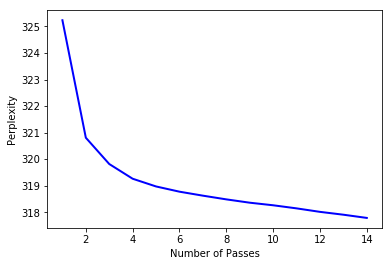

In [55]:
import matplotlib.pyplot as plt
graph_passes_draw(passes,p)

In [69]:
iterations = list(range(50, 501,50)) # iterations对困惑度影响
i=[]
for iteration in iterations:
#     print(f"runing number {num} at {start}")
    lda = gensim.models.ldamodel.LdaModel.load('../model/lda_model_iterations/lda_%d.model' % iteration)
    corpus = corpora.MmCorpus('corpus.mm')
#     print("corpus:",corpus)
#     print("corpus.num_docs:",corpus.num_docs)
    testset = []
    for c in range(int(corpus.num_docs/100)):  # 如何抽取训练集
#         print(corpus[c*5])
        testset.append(corpus[c*100])
#     print(testset)
    prep = perplexity(lda, testset, dictionary, len(dictionary.keys()), 8)
    i.append(prep)

the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 308.22469222367204
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 312.4147143645221
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 316.0126633243379
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 318.7746911740101
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 320.9132090921532
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 324.7712218502303
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ld

In [70]:
iterations_2 = list(range(10, 51,10)) # iterations对困惑度影响
i_2=[]
for iteration in iterations_2:
#     print(f"runing number {num} at {start}")
    lda = gensim.models.ldamodel.LdaModel.load('../model/lda_model_iterations/lda_%d.model' % iteration)
    corpus = corpora.MmCorpus('corpus.mm')
#     print("corpus:",corpus)
#     print("corpus.num_docs:",corpus.num_docs)
    testset = []
    for c in range(int(corpus.num_docs/100)):  # 如何抽取训练集
#         print(corpus[c*5])
        testset.append(corpus[c*100])
#     print(testset)
    prep = perplexity(lda, testset, dictionary, len(dictionary.keys()), 8)
    i_2.append(prep)

the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 305.22954673994843
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 307.3763835033093
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 309.5866074844475
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 310.05317629331677
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 308.22469222367204


In [71]:
total_iterations = [40] + list(range(50, 201,50))
total_i = [i_2[-2]] + i[0:4]
print(total_i)

[310.05317629331677, 308.22469222367204, 312.4147143645221, 316.0126633243379, 318.7746911740101]


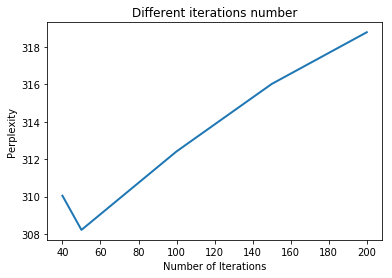

In [74]:
graph_iterations_draw(total_iterations,total_i)

In [43]:
nums = list(range(1, 21)) # iterations对困惑度影响
n=[]
for num in nums:
#     print(f"runing number {num} at {start}")
    lda = gensim.models.ldamodel.LdaModel.load('../model/lda_model_topicnums/lda_%d.model' % num)
    corpus = corpora.MmCorpus('corpus.mm')
#     print("corpus:",corpus)
#     print("corpus.num_docs:",corpus.num_docs)
    testset = []
    for c in range(int(corpus.num_docs/100)):  # 如何抽取训练集
#         print(corpus[c*5])
        testset.append(corpus[c*100])
#     print(testset)
    prep = perplexity(lda, testset, dictionary, len(dictionary.keys()), num)
    n.append(prep)

the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 1
the perplexity of this ldamodel is : 385.9007852949785
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 2
the perplexity of this ldamodel is : 349.65668116457044
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 3
the perplexity of this ldamodel is : 330.96514380140235
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 4
the perplexity of this ldamodel is : 319.37014757230514
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 5
the perplexity of this ldamodel is : 310.5965466314383
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 6
the perplexity of this ldamodel is : 307.21358800843603
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 7
the perplexity of this

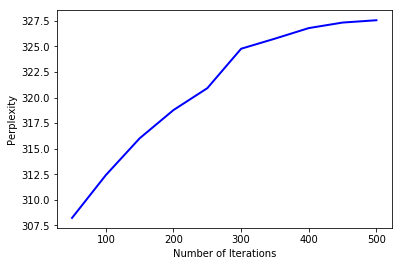

In [50]:
graph_iterations_draw(iterations,i)

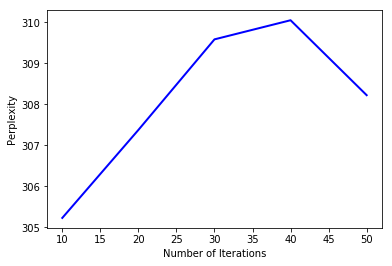

In [51]:
graph_iterations_draw(iterations_2,i_2)

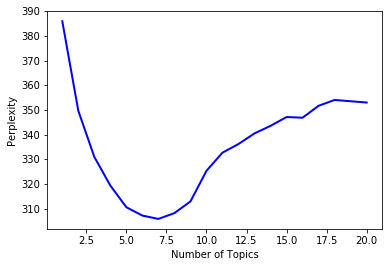

In [52]:
graph_numtopics_draw(nums,n)